In [2]:
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import LeaveOneGroupOut, cross_val_score, cross_validate
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelBinarizer
from nilearn.masking import unmask
from nilearn.plotting import view_img
from sklearn.preprocessing import maxabs_scale

# Nilearn stuff
from nilearn.masking import unmask
from nilearn.plotting import view_img, plot_stat_map
from nilearn.image import mean_img, smooth_img

import matplotlib.pyplot as plt
import glob

import seaborn as sns

In [3]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay, roc_curve

In [4]:
sub_df = pd.read_csv('/home/zetetic/Downloads/sim_cbgt_network_ROC_clean.csv')

In [5]:
sub_df.head()

,true_positive_rate,false_positive_rate,seed,iteration,sim_sub
0,0.000000,0.00,1299629,0,1
1,0.293661,0.11,1299629,0,1
2,0.587321,0.22,1299629,0,1
3,0.880982,0.33,1299629,0,1
4,0.938667,0.44,1299629,0,1


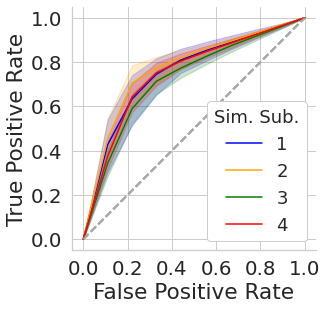

In [11]:

sns.set(font_scale=1.8, style='whitegrid')

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

sub_cols = ['blue', 'orange',  'green','red']

for i, s in enumerate(sub_df.sim_sub.unique()):

#     fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    s_df = sub_df.loc[sub_df.sim_sub==s]
    
    sns.lineplot(x=s_df.false_positive_rate, y=s_df.true_positive_rate, data=s_df, ax=ax, 
                    color=sub_cols[i], estimator=np.mean, ci=95, label=str(s_df.sim_sub.unique()[0]))
        
    ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="darkgray",   alpha=0.8)

#     ax.fill_between(
#         s_df.fpr50,
#         s_df.tpr25.values,
#         s_df.tpr975.values,
#         color=sub_cols[i],
#         alpha=0.5,
#     )
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.])
    ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.])
    ax.set_aspect('equal', 'box')
    legend = ax.legend(title='Sim. Sub.',frameon=1,framealpha=1,fontsize='small')
    legend.get_title().set_fontsize('small') #
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
#     plt.legend()
    plt.tight_layout()
    sns.despine()
    
plt.savefig('/home/zetetic/Desktop/loki_figs/prediction_acc/sim_ROC_CIs.png',dpi=300)
# plt.savefig('/home/zetetic/Desktop/human_ROC_CIs.pdf')